In [1]:
import numpy as np
import pandas as pd

# Load dataset
df = pd.read_csv("Housing.csv")

# Convert categorical columns to numerical values
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in categorical_columns:
    df[col] = df[col].astype('category').cat.codes

# Extract features and target
X = df.drop(columns=["price"]).values
y = df["price"].values.reshape(-1, 1)

# Normalize features
X_max = np.max(X, axis=0)
y_max = np.max(y)
X = X / X_max
y = y / y_max

# Split dataset into training and testing
np.random.seed(42)
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]
train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Activation Functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Neural Network Parameters
input_neurons = X.shape[1]
hidden_neurons_1 = 10
hidden_neurons_2 = 8
output_neurons = 1
learning_rate = 0.01
epochs = 100

# Initialize Weights and Biases
np.random.seed(42)
W1 = np.random.uniform(-1, 1, (input_neurons, hidden_neurons_1))
b1 = np.random.uniform(-1, 1, (1, hidden_neurons_1))
W2 = np.random.uniform(-1, 1, (hidden_neurons_1, hidden_neurons_2))
b2 = np.random.uniform(-1, 1, (1, hidden_neurons_2))
W3 = np.random.uniform(-1, 1, (hidden_neurons_2, output_neurons))
b3 = np.random.uniform(-1, 1, (1, output_neurons))

loss_values = []
accuracy_values = []

# Training Loop
for epoch in range(epochs):
    # Forward Pass
    H1_in = np.dot(X_train, W1) + b1
    H1_out = relu(H1_in)

    H2_in = np.dot(H1_out, W2) + b2
    H2_out = relu(H2_in)

    Y_in = np.dot(H2_out, W3) + b3
    Y_out = sigmoid(Y_in)
    
    # Compute Loss
    loss = mse_loss(y_train, Y_out)
    loss_values.append(loss)

    # Compute Train Accuracy (1 - Mean Absolute Error)
    train_accuracy = 1 - np.mean(np.abs(y_train - Y_out))
    accuracy_values.append(train_accuracy)

    # Compute Validation Accuracy
    H1_val = relu(np.dot(X_test, W1) + b1)
    H2_val = relu(np.dot(H1_val, W2) + b2)
    Y_val = sigmoid(np.dot(H2_val, W3) + b3)
    val_accuracy = 1 - np.mean(np.abs(y_test - Y_val))
    
    # Backpropagation
    delta_output = (y_train - Y_out) * sigmoid_derivative(Y_out)
    delta_H2 = np.dot(delta_output, W3.T) * relu_derivative(H2_out)
    delta_H1 = np.dot(delta_H2, W2.T) * relu_derivative(H1_out)

    # Update Weights and Biases
    W3 += np.dot(H2_out.T, delta_output) * learning_rate
    b3 += np.sum(delta_output, axis=0, keepdims=True) * learning_rate
    W2 += np.dot(H1_out.T, delta_H2) * learning_rate
    b2 += np.sum(delta_H2, axis=0, keepdims=True) * learning_rate
    W1 += np.dot(X_train.T, delta_H1) * learning_rate
    b1 += np.sum(delta_H1, axis=0, keepdims=True) * learning_rate

    print(f"\n\nEpoch {epoch + 1}: Loss = {loss:.6f}, Train Accuracy = {train_accuracy*100:.4f}%, Val Accuracy = {val_accuracy*100:.4f}%")
    print(f"\nDelta Output: {delta_output[:5]}")
    print(f"\nDelta H2: {delta_H2[:5]}")
    print(f"\nDelta H1: {delta_H1[:5]}")
    print(f"\nWeight Updates: W3: {W3[:5]}, W2: {W2[:5]}, W1: {W1[:5]}")
    print(f"\ny_in: {Y_in[:5]}, y_out: {Y_out[:5]}\n")

# Testing
H1_test = relu(np.dot(X_test, W1) + b1)
H2_test = relu(np.dot(H1_test, W2) + b2)
Y_test_pred = sigmoid(np.dot(H2_test, W3) + b3)
test_loss = mse_loss(y_test, Y_test_pred)
test_accuracy = 1 - np.mean(np.abs(y_test - Y_test_pred))

print(f"\nTest Loss: {test_loss:.6f}, Test Accuracy: {test_accuracy:.4f}")

# Prediction Function
def predict_price(features):
    features = np.array(features).reshape(1, -1) / X_max
    H1 = relu(np.dot(features, W1) + b1)
    H2 = relu(np.dot(H1, W2) + b2)
    Y = sigmoid(np.dot(H2, W3) + b3)
    return Y * y_max

# Confidence Calculation
def confidence_interval(test_accuracy):
    return f"Confidence: {test_accuracy * 100:.2f}%"

new_house = [7420, 4, 2, 3, 1, 0, 0, 0, 1, 2, 1, 2]  # Example
predicted_price = predict_price(new_house)
confidence = confidence_interval(test_accuracy)
print(f"\nPredicted House Price: {round(predicted_price[0][0], 4)}")
print(confidence)




Epoch 1: Loss = 0.225066, Train Accuracy = 55.4157%, Val Accuracy = 57.5643%

Delta Output: [[-0.06177913]
 [-0.02470953]
 [-0.07165016]
 [-0.04802557]
 [-0.04856124]]

Delta H2: [[-0.01848838 -0.04314944 -0.         -0.          0.05020484  0.
   0.          0.03163219]
 [-0.00739472 -0.0172583  -0.00778908 -0.          0.          0.
   0.01160348  0.        ]
 [-0.02144244 -0.05004383 -0.02258598 -0.          0.          0.
   0.          0.03668637]
 [-0.01437241 -0.03354331 -0.0151389  -0.          0.039028    0.
   0.          0.        ]
 [-0.01453272 -0.03391744 -0.01530775 -0.          0.          0.
   0.          0.        ]]

Delta H1: [[ 0.         -0.06524657  0.03604405 -0.         -0.          0.04256331
   0.         -0.04892946  0.         -0.08335779]
 [ 0.         -0.02646475 -0.         -0.         -0.          0.
   0.          0.0022337   0.         -0.        ]
 [ 0.         -0.09624085  0.          0.00692196  0.          0.03191196
   0.         -0.01070231 

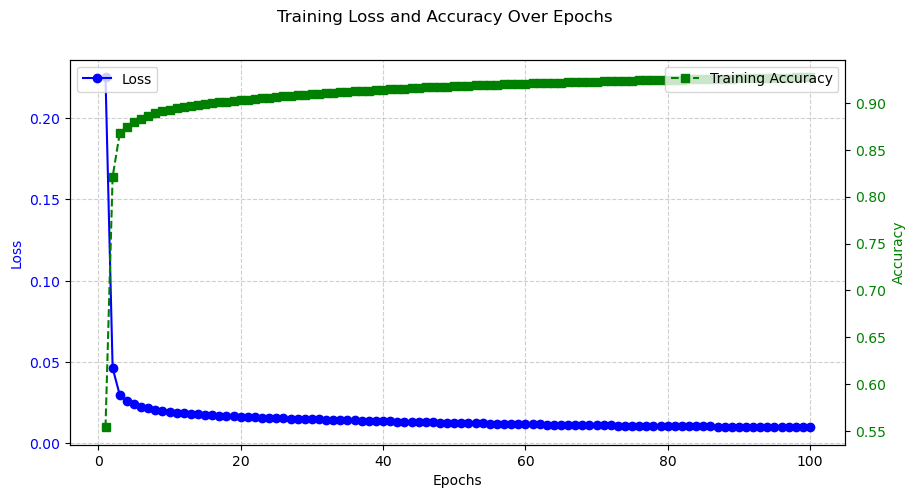

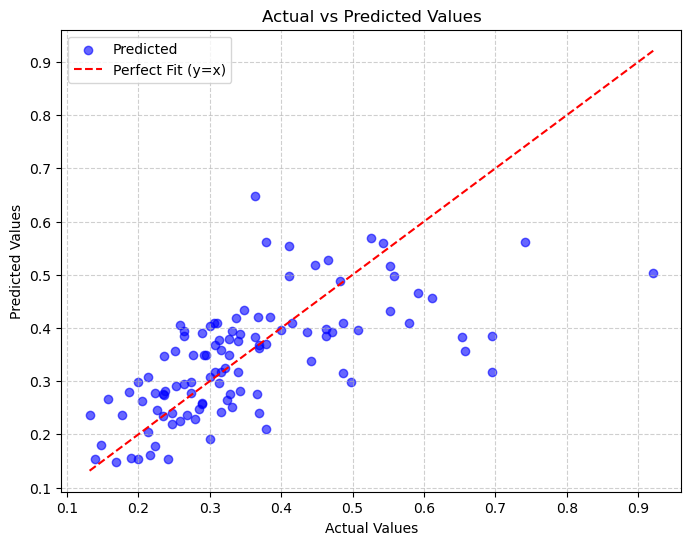

In [3]:
import matplotlib.pyplot as plt

# Plot 1: Loss and Accuracy in the Same Graph
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Loss (Left Y-Axis)
ax1.plot(range(1, epochs + 1), loss_values, marker='o', linestyle='-', color='b', label="Loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create second y-axis for Accuracy (Right Y-Axis)
ax2 = ax1.twinx()
ax2.plot(range(1, epochs + 1), accuracy_values, marker='s', linestyle='--', color='g', label="Training Accuracy")
ax2.set_ylabel("Accuracy", color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Title and Grid
fig.suptitle("Training Loss and Accuracy Over Epochs")
ax1.grid(True, linestyle="--", alpha=0.6)

# Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

# Plot 2: Actual vs Predicted Values (Directly Using Existing Values)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, Y_test_pred, color="blue", alpha=0.6, label="Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red", label="Perfect Fit (y=x)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()